In [1]:
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Grouper
from pandas import DataFrame
import csv
import pickle
import math
import matrixprofile as mp
from matplotlib.patches import Rectangle
from fbprophet import Prophet
from prophet.plot import plot_yearly
from sklearn.metrics import mean_squared_error
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from sklearn.model_selection import TimeSeriesSplit
from numpy import sqrt
import datetime
from datetime import timedelta

/home/jonathan/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def df_origen(origen,destino):    
    
    ######################PICKLE 1###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento1.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df1 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento1.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df1.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)            
    
    df1_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento1.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)   
    
    ######################PICKLE 2###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento2.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df2 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento2.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df2.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)           
    
    df2_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento2.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)   
    
    ######################PICKLE 3###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento3.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df3 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento3.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df3.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)            
    
    df3_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento3.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)
    
    
    
    df1_Final['Fecha'] = df1_Final.index.date
    df1_Final['Año'] = df1_Final.index.year                                
    df1_Final['Mes'] = df1_Final.index.month                               
    df1_Final['ID_Dia'] = df1_Final.index.dayofweek
    df1_Final['Hora'] = df1_Final.index.hour
    df1_Final['WeekNo'] = df1_Final.index.isocalendar().week
    
    df2_Final['Fecha'] = df2_Final.index.date
    df2_Final['Año'] = df2_Final.index.year                                
    df2_Final['Mes'] = df2_Final.index.month                               
    df2_Final['ID_Dia'] = df2_Final.index.dayofweek
    df2_Final['Hora'] = df2_Final.index.hour
    df2_Final['WeekNo'] = df2_Final.index.isocalendar().week
    
    df3_Final['Fecha'] = df3_Final.index.date
    df3_Final['Año'] = df3_Final.index.year                                
    df3_Final['Mes'] = df3_Final.index.month                               
    df3_Final['ID_Dia'] = df3_Final.index.dayofweek
    df3_Final['Hora'] = df3_Final.index.hour
    df3_Final['WeekNo'] = df3_Final.index.isocalendar().week
    
    return df1, lista, df2, df3, df1_Final,df2_Final,df3_Final, listaDst

In [3]:
origen = "2807905"
destino = "2807901"
df1, lista, df2, df3, df1_Final,df2_Final,df3_Final, listaDst = df_origen(origen,destino)
df1_Final.head(5)
df2_Final.head(5)
df3_Final.head(5)

,2807905-2807901,Fecha,Año,Mes,ID_Dia,Hora,WeekNo
ds,,,,,,,
2020-08-01 00:00:00,342.675,2020-08-01,2020,8,5,0,31
2020-08-01 01:00:00,161.815,2020-08-01,2020,8,5,1,31
2020-08-01 02:00:00,69.203,2020-08-01,2020,8,5,2,31
2020-08-01 03:00:00,44.679,2020-08-01,2020,8,5,3,31
2020-08-01 04:00:00,27.632,2020-08-01,2020,8,5,4,31


In [4]:
#Creamos intervalos de datos por periodos
data1=df1_Final.loc['2020-03-16':'2020-04-15']
data2=df1_Final.loc['2020-04-16':'2020-05-15']
data3=df1_Final.loc['2020-05-01':'2020-05-31']
data4=df2_Final.loc['2020-06-01':'2020-06-30']
data5=df2_Final.loc['2020-07-01':'2020-07-31']
data6=df3_Final.loc['2020-08-01':'2020-08-31']
data6.tail(5)

,2807905-2807901,Fecha,Año,Mes,ID_Dia,Hora,WeekNo
ds,,,,,,,
2020-08-31 19:00:00,509.100,2020-08-31,2020,8,0,19,36
2020-08-31 20:00:00,293.615,2020-08-31,2020,8,0,20,36
2020-08-31 21:00:00,256.641,2020-08-31,2020,8,0,21,36
2020-08-31 22:00:00,172.866,2020-08-31,2020,8,0,22,36
2020-08-31 23:00:00,140.111,2020-08-31,2020,8,0,23,36


In [5]:
##### Creamos tablas con cada uno de los principales trayectos
lista_periodos=[1,2,3,4,5,6]    
dict_dias={0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"}
        
for periodo in lista_periodos:        
    cont=0
    globals()[f"d{periodo}"] = globals()[f"data{periodo}"].reset_index()                                
    globals()[f"df_{periodo}"] = pd.DataFrame(data=globals()[f"d{periodo}"], columns=['ds',listaDst[1],'Hora','Fecha','WeekNo','ID_Dia'])
    globals()[f"df_{periodo}"].set_index([listaDst[1]], inplace = True) 
    
    for dia in dict_dias:        
        globals()[f"df_{dict_dias[dia]}_{periodo}"] = globals()[f"df_{periodo}"].loc[globals()[f"df_{periodo}"].loc[:,'ID_Dia'] == cont]  # Seleccionamos solo los datos del lunes o solo los datos del martes para crear nuevas tablas dependiendo del día        
        globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"] = pd.DataFrame({})  #Creamos un nuevo dataframe vacio
        globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"] = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].append(globals()[f"df_{dict_dias[dia]}_{periodo}"])  #Guardamos en el dataframe vacio cada una de las tablas, hay tabla lunes, tabla martes..
        
        #Seleccionamos celdas del dataframe para generar las fechas que se requieren graficar
        start = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].iloc[0]['Fecha'] #Primera celda de la columna fecha
        period_start = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].iloc[0]['WeekNo']
        period_end = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].at[globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].index[-1],'WeekNo']  #última celda de columna WeekNo
        
        #Condición de error en period_start/period_end
        if (type(period_start) == pd.core.series.Series) | (type(period_end) == pd.core.series.Series):    
            lista = list(period_end)
            period_end = lista[-1]        
        
        periods = list(range(period_start, period_end+1))

        #Obtenemos las fechas de cada día 
        date_generated = pd.date_range(start, periods=len(periods), freq='7D')
        
        #Creamos una tabla para cada fecha de cada lunes o de cada martes..
        cont2=1        
        for date in date_generated:            
            globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}_{cont2}"] = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].loc[globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].loc[:,'Fecha'] == date]
            cont2=cont2+1
        cont=cont+1
    

/tmp/ipykernel_7510/4220055855.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"] = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].append(globals()[f"df_{dict_dias[dia]}_{periodo}"])  #Guardamos en el dataframe vacio cada una de las tablas, hay tabla lunes, tabla martes..
/home/jonathan/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
/tmp/ipykernel_7510/4220055855.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  globals()[f"filtra

/tmp/ipykernel_7510/4220055855.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"] = globals()[f"filtrado_Data_{dict_dias[dia]}_{periodo}"].append(globals()[f"df_{dict_dias[dia]}_{periodo}"])  #Guardamos en el dataframe vacio cada una de las tablas, hay tabla lunes, tabla martes..
/home/jonathan/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
/tmp/ipykernel_7510/4220055855.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  globals()[f"filtra

In [6]:
period1 = filtrado_Data_Monday_3
period2 = filtrado_Data_Monday_4
period3 = filtrado_Data_Monday_5
period4 = filtrado_Data_Monday_6
Lunes = pd.concat([period1,period2,period3,period4])
start_date = pd.Timestamp('2020-05-02')
end_date = pd.Timestamp('2020-08-31')
mask = (Lunes['Fecha'] >= start_date) & (Lunes['Fecha'] <= end_date)
Lunes = Lunes.loc[mask]
Lunes = Lunes.reset_index()
Lunes = Lunes.set_index(["ds"])
#desescalada.tail(50)

/home/jonathan/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


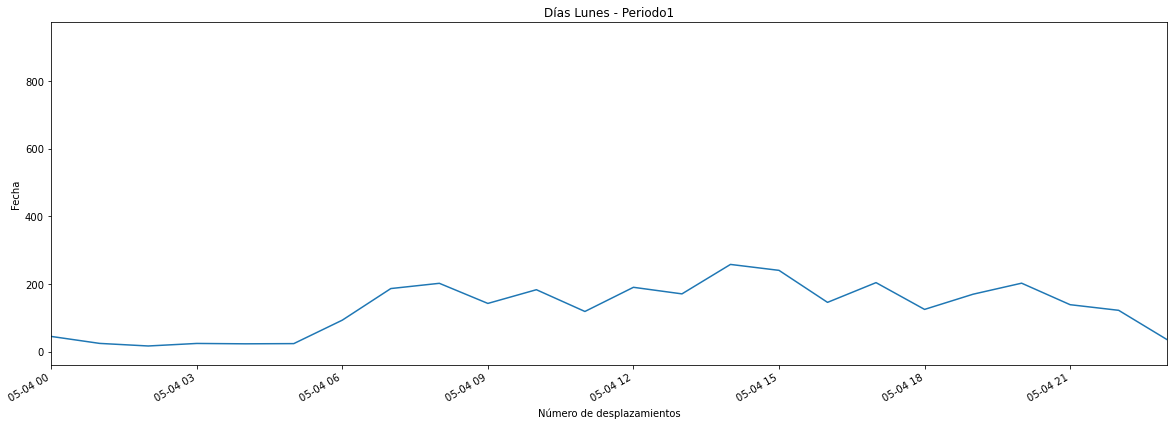

In [39]:
Lunes[Lunes.columns[0]].plot(figsize=(20,7), legend=None, title='Días Lunes - Periodo1')
plt.xlim([pd.to_datetime('2020-05-04 00:00:00'), pd.to_datetime('2020-05-04 23:00:00')])
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()


# Patrón Día Lunes 8 Am

In [8]:
filtrar_Hora1 = Lunes.loc[Lunes.loc[:,'Hora'] == 1]
filtrar_Hora2 = Lunes.loc[Lunes.loc[:,'Hora'] == 2]
filtrar_Hora3 = Lunes.loc[Lunes.loc[:,'Hora'] == 7]
filtrar_Hora4 = Lunes.loc[Lunes.loc[:,'Hora'] == 8]
filtrar_Hora5 = Lunes.loc[Lunes.loc[:,'Hora'] == 12]
filtrar_Hora6 = Lunes.loc[Lunes.loc[:,'Hora'] == 13]
filtrar_Hora7 = Lunes.loc[Lunes.loc[:,'Hora'] == 14]
filtrar_Hora8 = Lunes.loc[Lunes.loc[:,'Hora'] == 17]
filtrar_Hora9 = Lunes.loc[Lunes.loc[:,'Hora'] == 18]
filtrar_Hora10 = Lunes.loc[Lunes.loc[:,'Hora'] == 19]
filtrar_Hora11 = Lunes.loc[Lunes.loc[:,'Hora'] == 22]
filtrar_Hora12 = Lunes.loc[Lunes.loc[:,'Hora'] == 23]
filtrar_Hora13 = Lunes.loc[Lunes.loc[:,'Hora'] == 0]


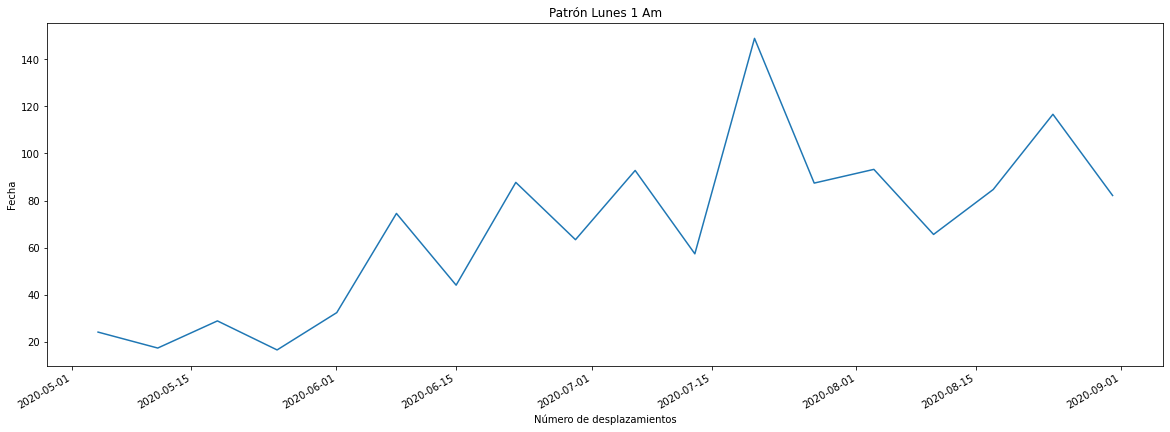

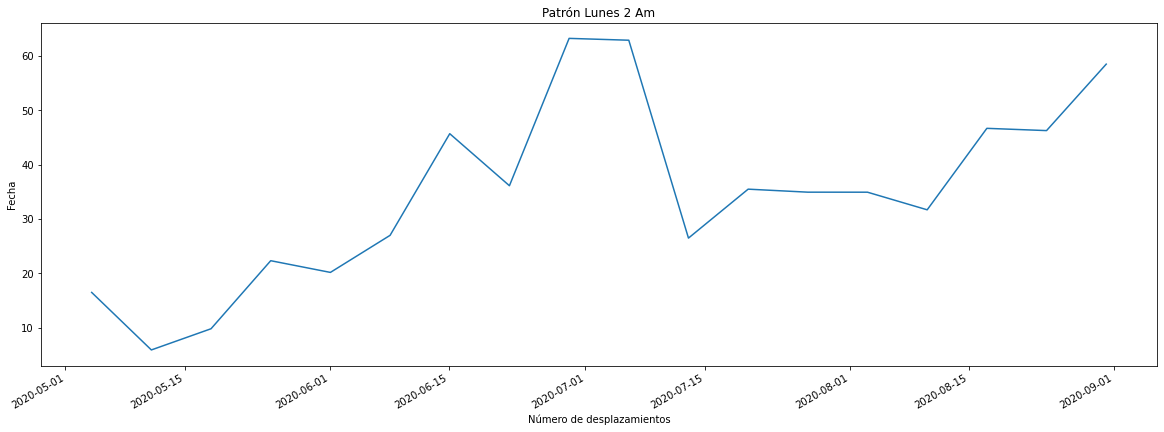

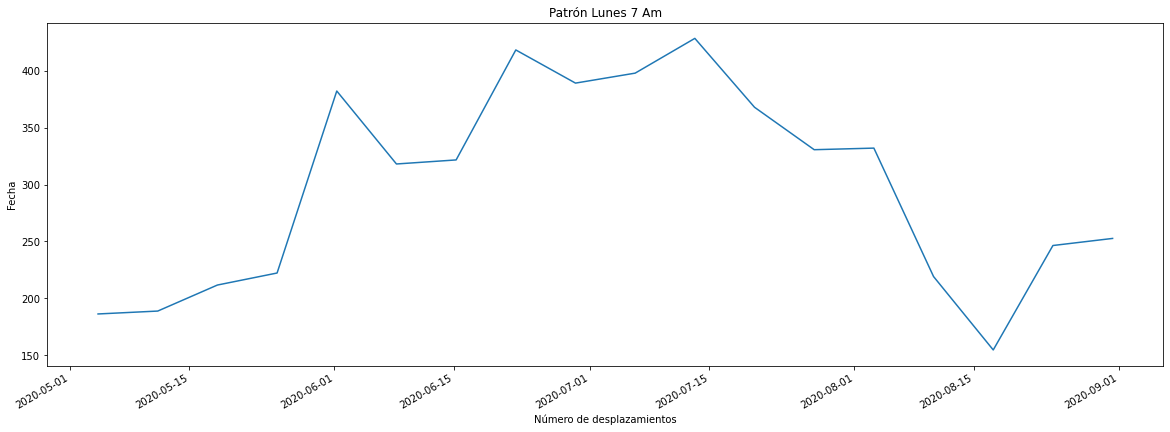

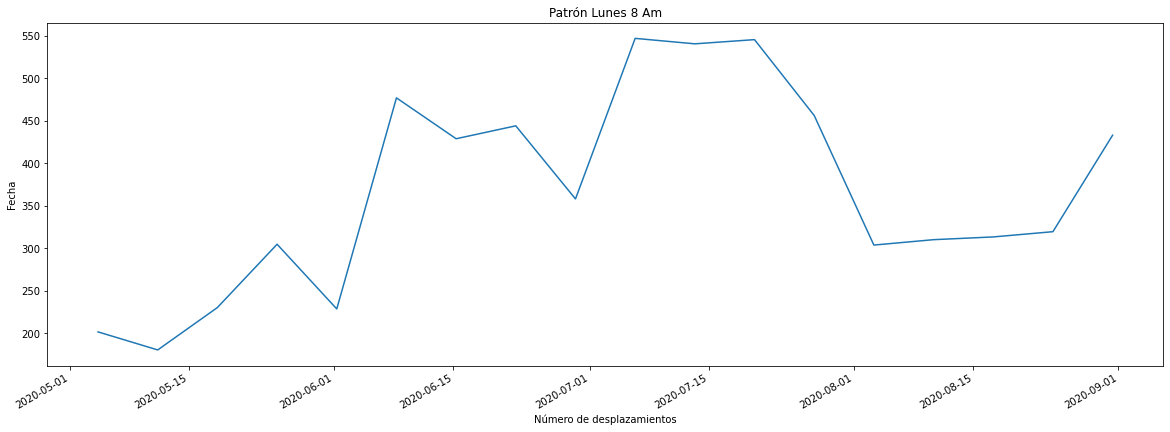

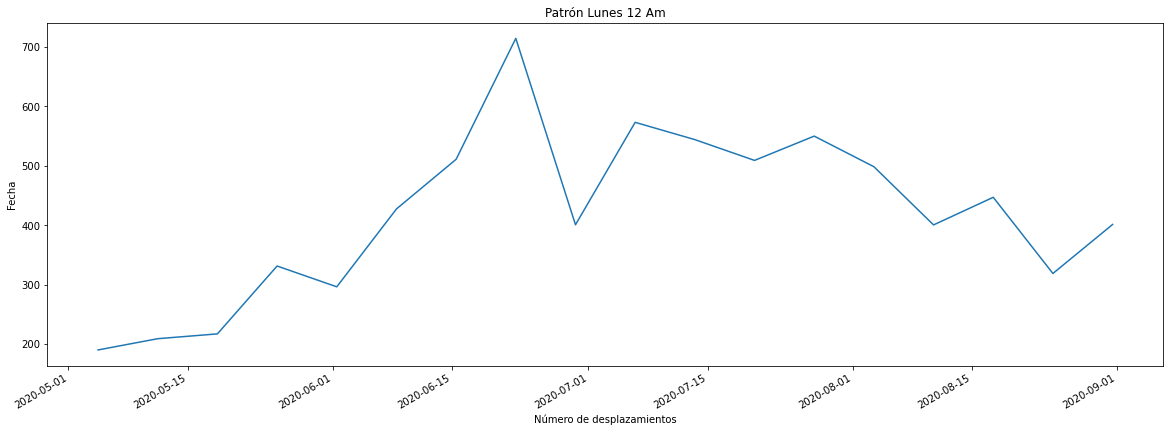

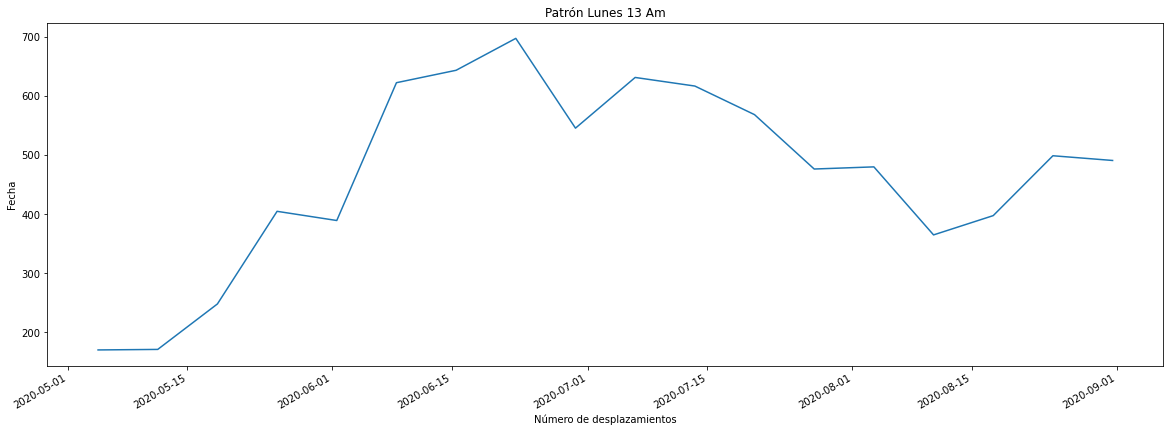

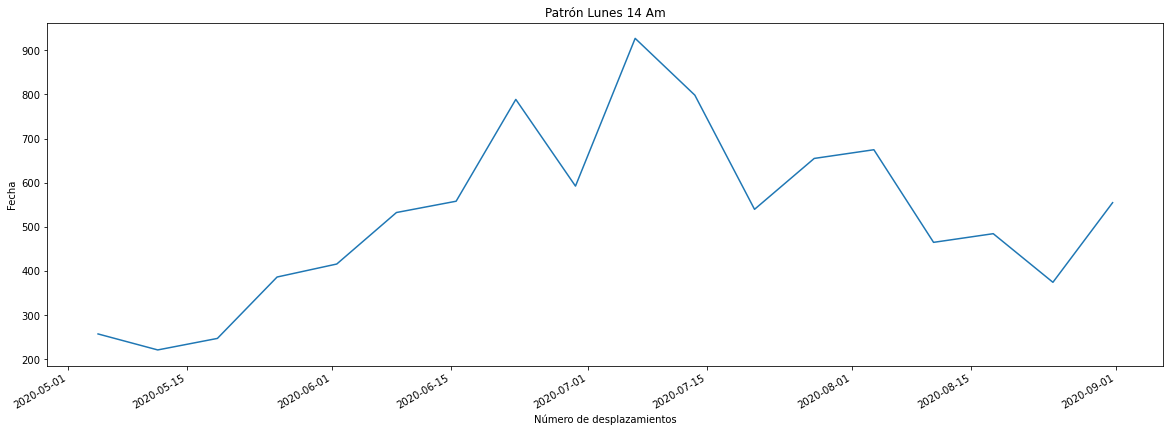

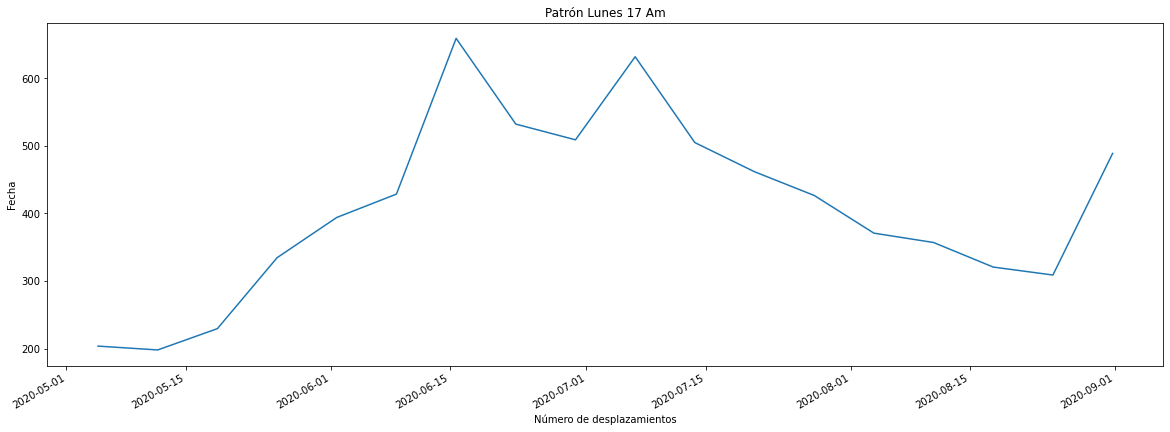

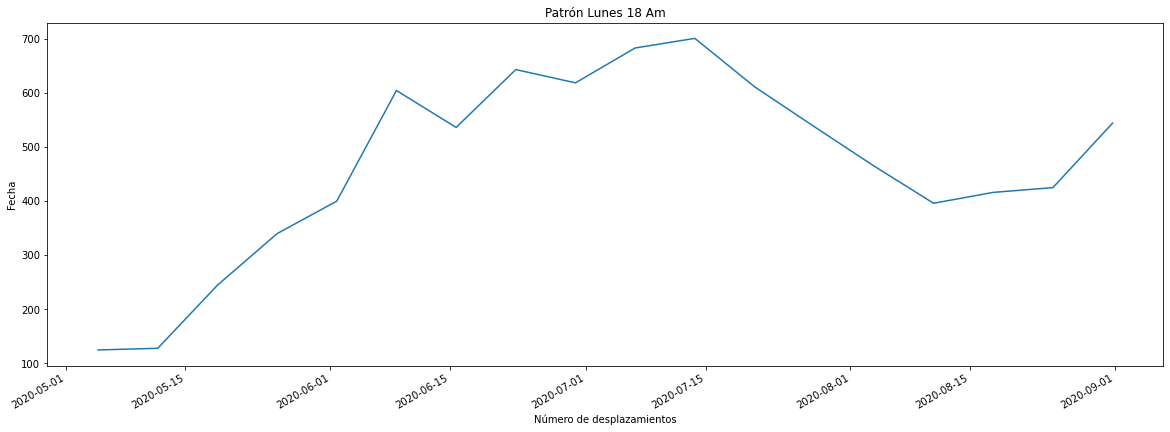

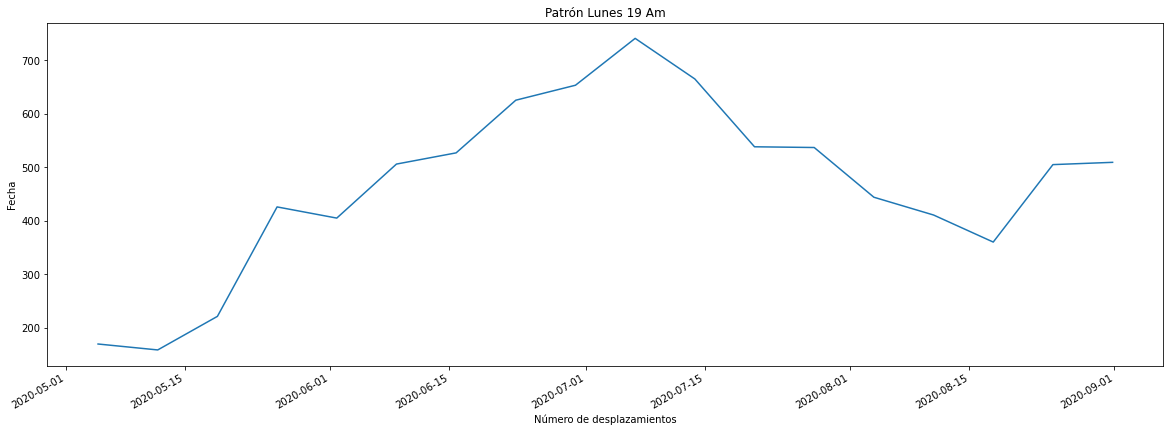

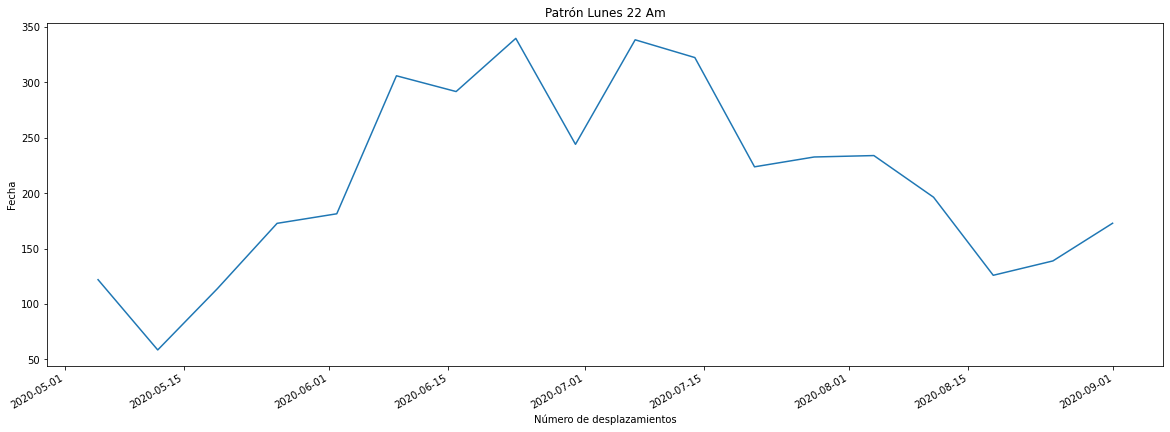

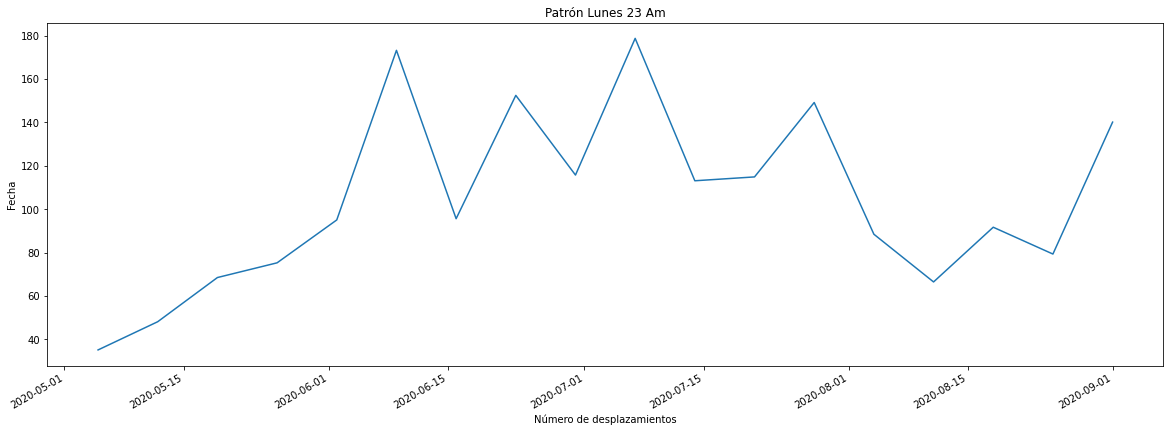

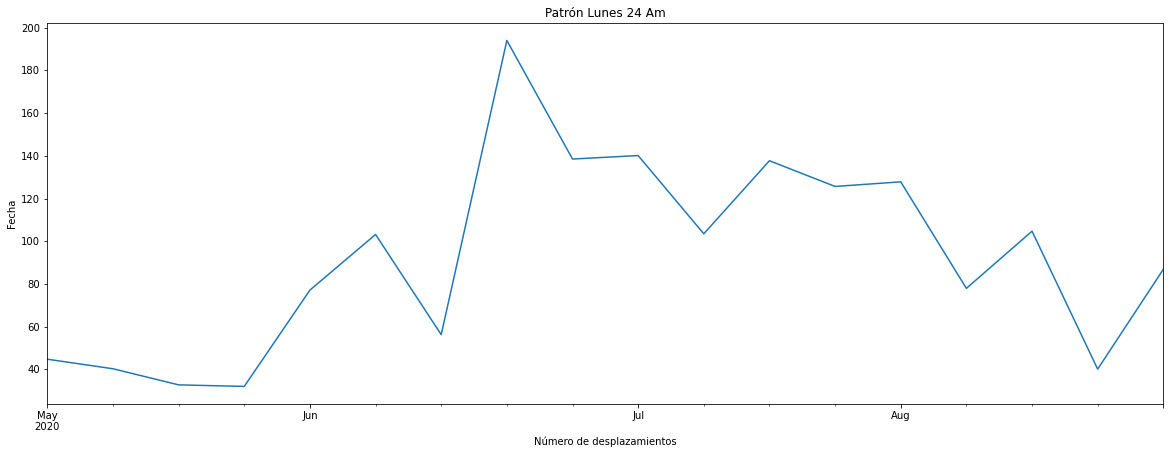

In [9]:
filtrar_Hora1[filtrar_Hora1.columns[0]].plot(figsize=(20,7), legend=None, title='Patrón Lunes 1 Am')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()
filtrar_Hora2[filtrar_Hora2.columns[0]].plot(figsize=(20,7), legend=None, title='Patrón Lunes 2 Am')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()
filtrar_Hora3[filtrar_Hora3.columns[0]].plot(figsize=(20,7), legend=None, title='Patrón Lunes 7 Am')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()
filtrar_Hora4[filtrar_Hora4.columns[0]].plot(figsize=(20,7), legend=None, title='Patrón Lunes 8 Am')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()
filtrar_Hora5[filtrar_Hora5.columns[0]].plot(figsize=(20,7), legend=None, title='Patrón Lunes 12 Am')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()
filtrar_Hora6[filtrar_Hora6.columns[0]].plot(figsize=(20,7), legend=None, title='Patrón Lunes 13 Am')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()
filtrar_Hora7[filtrar_Hora7.columns[0]].plot(figsize=(20,7), legend=None, title='Patrón Lunes 14 Am')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()
filtrar_Hora8[filtrar_Hora8.columns[0]].plot(figsize=(20,7), legend=None, title='Patrón Lunes 17 Am')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()
filtrar_Hora9[filtrar_Hora9.columns[0]].plot(figsize=(20,7), legend=None, title='Patrón Lunes 18 Am')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()
filtrar_Hora10[filtrar_Hora10.columns[0]].plot(figsize=(20,7), legend=None, title='Patrón Lunes 19 Am')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()
filtrar_Hora11[filtrar_Hora11.columns[0]].plot(figsize=(20,7), legend=None, title='Patrón Lunes 22 Am')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()
filtrar_Hora12[filtrar_Hora12.columns[0]].plot(figsize=(20,7), legend=None, title='Patrón Lunes 23 Am')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()
filtrar_Hora13[filtrar_Hora13.columns[0]].plot(figsize=(20,7), legend=None, title='Patrón Lunes 24 Am')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()

# Dividimos el periodo 1 en 2 subconjuntos - Desescalada y Nueva normalidad
## Desescalada: 2 Mayo - 8 Junio

In [10]:
start_date = pd.Timestamp('2020-05-02')
end_date = pd.Timestamp('2020-06-08')
mask = (Lunes['Fecha'] >= start_date) & (Lunes['Fecha'] <= end_date)
LunesDesescalada = Lunes.loc[mask]

/home/jonathan/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


## Nueva normalidad: 9 Junio - 31 Agosto

In [11]:
start_date = pd.Timestamp('2020-06-09')
end_date = pd.Timestamp('2020-08-31')
mask = (Lunes['Fecha'] >= start_date) & (Lunes['Fecha'] <= end_date)
LunesNnormalidad = Lunes.loc[mask]

# Preparamos los datos 

In [12]:
LunesDesescalada = LunesDesescalada.drop(columns=['Fecha','ID_Dia','Hora','WeekNo'])
LunesDesescalada = LunesDesescalada.reset_index()
LunesDesescalada = LunesDesescalada.rename(columns={'2807905-2807901':'y'})

LunesNnormalidad = LunesNnormalidad.drop(columns=['Fecha','ID_Dia','Hora','WeekNo'])
LunesNnormalidad = LunesNnormalidad.reset_index()
LunesNnormalidad = LunesNnormalidad.rename(columns={'2807905-2807901':'y'})
#Lunes.tail(50)

# Establecemos una estacionalidad condicional

In [13]:
def est_Lunes1AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 1)

def est_Lunes2AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 2)

def est_Lunes3AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 3)

def est_Lunes4AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 4)

def est_Lunes5AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 5)

def est_Lunes6AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 6)

def est_Lunes7AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 7)

def est_Lunes8AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 8)

def est_Lunes9AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 9)

def est_Lunes10AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 10)

def est_Lunes11AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 11)

def est_Lunes12PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 12)

def est_Lunes13PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 13)

def est_Lunes14PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 14)

def est_Lunes15PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 15)

def est_Lunes16PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 16)

def est_Lunes17PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 17)

def est_Lunes18PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 18)

def est_Lunes19PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 19)

def est_Lunes20PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 20)

def est_Lunes21PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 21)

def est_Lunes22PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 22)

def est_Lunes23PM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 23)

def est_Lunes24AM(ds):
    date = pd.to_datetime(ds)
    return (date.hour == 0)

LunesDesescalada['Lunes1AM'] = LunesDesescalada['ds'].apply(est_Lunes1AM)
LunesNnormalidad['Lunes1AM'] = LunesNnormalidad['ds'].apply(est_Lunes1AM)

LunesDesescalada['Lunes2AM'] = LunesDesescalada['ds'].apply(est_Lunes2AM)
LunesNnormalidad['Lunes2AM'] = LunesNnormalidad['ds'].apply(est_Lunes2AM)

LunesDesescalada['Lunes3AM'] = LunesDesescalada['ds'].apply(est_Lunes3AM)
LunesNnormalidad['Lunes3AM'] = LunesNnormalidad['ds'].apply(est_Lunes3AM)

LunesDesescalada['Lunes4AM'] = LunesDesescalada['ds'].apply(est_Lunes4AM)
LunesNnormalidad['Lunes4AM'] = LunesNnormalidad['ds'].apply(est_Lunes4AM)

LunesDesescalada['Lunes5AM'] = LunesDesescalada['ds'].apply(est_Lunes5AM)
LunesNnormalidad['Lunes5AM'] = LunesNnormalidad['ds'].apply(est_Lunes5AM)

LunesDesescalada['Lunes6AM'] = LunesDesescalada['ds'].apply(est_Lunes6AM)
LunesNnormalidad['Lunes6AM'] = LunesNnormalidad['ds'].apply(est_Lunes6AM)

LunesDesescalada['Lunes7AM'] = LunesDesescalada['ds'].apply(est_Lunes7AM)
LunesNnormalidad['Lunes7AM'] = LunesNnormalidad['ds'].apply(est_Lunes7AM)

LunesDesescalada['Lunes8AM'] = LunesDesescalada['ds'].apply(est_Lunes8AM)
LunesNnormalidad['Lunes8AM'] = LunesNnormalidad['ds'].apply(est_Lunes8AM)

LunesDesescalada['Lunes9AM'] = LunesDesescalada['ds'].apply(est_Lunes9AM)
LunesNnormalidad['Lunes9AM'] = LunesNnormalidad['ds'].apply(est_Lunes9AM)

LunesDesescalada['Lunes10AM'] = LunesDesescalada['ds'].apply(est_Lunes10AM)
LunesNnormalidad['Lunes10AM'] = LunesNnormalidad['ds'].apply(est_Lunes10AM)

LunesDesescalada['Lunes11AM'] = LunesDesescalada['ds'].apply(est_Lunes11AM)
LunesNnormalidad['Lunes11AM'] = LunesNnormalidad['ds'].apply(est_Lunes11AM)

LunesDesescalada['Lunes12PM'] = LunesDesescalada['ds'].apply(est_Lunes12PM)
LunesNnormalidad['Lunes12PM'] = LunesNnormalidad['ds'].apply(est_Lunes12PM)

LunesDesescalada['Lunes13PM'] = LunesDesescalada['ds'].apply(est_Lunes13PM)
LunesNnormalidad['Lunes13PM'] = LunesNnormalidad['ds'].apply(est_Lunes13PM)

LunesDesescalada['Lunes14PM'] = LunesDesescalada['ds'].apply(est_Lunes14PM)
LunesNnormalidad['Lunes14PM'] = LunesNnormalidad['ds'].apply(est_Lunes14PM)

LunesDesescalada['Lunes15PM'] = LunesDesescalada['ds'].apply(est_Lunes15PM)
LunesNnormalidad['Lunes15PM'] = LunesNnormalidad['ds'].apply(est_Lunes15PM)

LunesDesescalada['Lunes16PM'] = LunesDesescalada['ds'].apply(est_Lunes16PM)
LunesNnormalidad['Lunes16PM'] = LunesNnormalidad['ds'].apply(est_Lunes16PM)

LunesDesescalada['Lunes17PM'] = LunesDesescalada['ds'].apply(est_Lunes17PM)
LunesNnormalidad['Lunes17PM'] = LunesNnormalidad['ds'].apply(est_Lunes17PM)

LunesDesescalada['Lunes18PM'] = LunesDesescalada['ds'].apply(est_Lunes18PM)
LunesNnormalidad['Lunes18PM'] = LunesNnormalidad['ds'].apply(est_Lunes18PM)

LunesDesescalada['Lunes19PM'] = LunesDesescalada['ds'].apply(est_Lunes19PM)
LunesNnormalidad['Lunes19PM'] = LunesNnormalidad['ds'].apply(est_Lunes19PM)

LunesDesescalada['Lunes20PM'] = LunesDesescalada['ds'].apply(est_Lunes20PM)
LunesNnormalidad['Lunes20PM'] = LunesNnormalidad['ds'].apply(est_Lunes20PM)

LunesDesescalada['Lunes21PM'] = LunesDesescalada['ds'].apply(est_Lunes21PM)
LunesNnormalidad['Lunes21PM'] = LunesNnormalidad['ds'].apply(est_Lunes21PM)

LunesDesescalada['Lunes22PM'] = LunesDesescalada['ds'].apply(est_Lunes22PM)
LunesNnormalidad['Lunes22PM'] = LunesNnormalidad['ds'].apply(est_Lunes22PM)

LunesDesescalada['Lunes23PM'] = LunesDesescalada['ds'].apply(est_Lunes23PM)
LunesNnormalidad['Lunes23PM'] = LunesNnormalidad['ds'].apply(est_Lunes23PM)

LunesDesescalada['Lunes24AM'] = LunesDesescalada['ds'].apply(est_Lunes24AM)
LunesNnormalidad['Lunes24AM'] = LunesNnormalidad['ds'].apply(est_Lunes24AM)




# Implementación de Modelo Prophet

## Separamos el conjunto de datos de entrenamiento y prueba

In [14]:
LunesDesescalada = LunesDesescalada.set_index('ds')
LunesNnormalidad = LunesNnormalidad.set_index('ds')

In [15]:
#Desescalada
train_end_D = datetime.datetime(2020,6,1,23,0,0)
test_end_D = datetime.datetime(2020,6,8,23,0,0)

train_data_D = LunesDesescalada[:train_end_D]
test_data_D = LunesDesescalada[train_end_D + timedelta(days=1):test_end_D]

#Nueva Normalidad
train_end_N = datetime.datetime(2020,8,24,23,0,0)
test_end_N = datetime.datetime(2020,8,31,23,0,0)

train_data_N = LunesNnormalidad[:train_end_N]
test_data_N = LunesNnormalidad[train_end_N + timedelta(days=1):test_end_N]

In [16]:
train_data_D = train_data_D.reset_index()
train_data_N = train_data_N.reset_index()

# Ajustamos el periodo de Fourier-Horas con el periodo de datos entrenamiento

In [17]:
startD = train_data_D.iloc[0]['ds']
endD = train_data_D.iloc[-1]['ds'] 
N_Dias = pd.date_range(startD, endD, freq='D')
print(len(N_Dias))
print(N_Dias)

29
DatetimeIndex(['2020-05-04', '2020-05-05', '2020-05-06', '2020-05-07',
               '2020-05-08', '2020-05-09', '2020-05-10', '2020-05-11',
               '2020-05-12', '2020-05-13', '2020-05-14', '2020-05-15',
               '2020-05-16', '2020-05-17', '2020-05-18', '2020-05-19',
               '2020-05-20', '2020-05-21', '2020-05-22', '2020-05-23',
               '2020-05-24', '2020-05-25', '2020-05-26', '2020-05-27',
               '2020-05-28', '2020-05-29', '2020-05-30', '2020-05-31',
               '2020-06-01'],
              dtype='datetime64[ns]', freq='D')


In [18]:
startN = train_data_N.iloc[0]['ds']
endN = train_data_N.iloc[-1]['ds'] 
N_Dias = pd.date_range(startN, endN, freq='D')
print(len(N_Dias))
print(N_Dias)

71
DatetimeIndex(['2020-06-15', '2020-06-16', '2020-06-17', '2020-06-18',
               '2020-06-19', '2020-06-20', '2020-06-21', '2020-06-22',
               '2020-06-23', '2020-06-24', '2020-06-25', '2020-06-26',
               '2020-06-27', '2020-06-28', '2020-06-29', '2020-06-30',
               '2020-07-01', '2020-07-02', '2020-07-03', '2020-07-04',
               '2020-07-05', '2020-07-06', '2020-07-07', '2020-07-08',
               '2020-07-09', '2020-07-10', '2020-07-11', '2020-07-12',
               '2020-07-13', '2020-07-14', '2020-07-15', '2020-07-16',
               '2020-07-17', '2020-07-18', '2020-07-19', '2020-07-20',
               '2020-07-21', '2020-07-22', '2020-07-23', '2020-07-24',
               '2020-07-25', '2020-07-26', '2020-07-27', '2020-07-28',
               '2020-07-29', '2020-07-30', '2020-07-31', '2020-08-01',
               '2020-08-02', '2020-08-03', '2020-08-04', '2020-08-05',
               '2020-08-06', '2020-08-07', '2020-08-08', '2020-08-09',
   

# Desescalada
## Aplicamos Rolling Forecasting para evaluación del modelo

In [19]:
def crossvalidation():        
    predictions_rolling = pd.DataFrame({})
    test = test_data_D.copy()
    test = test.reset_index()
    test = test.drop(columns=['y'])    
    
    for end_date in test_data_D.index:
        print(end_date)
        train_data_D = LunesDesescalada[:end_date - timedelta(hours=1)]  #Entrenamos el modelo cada que avanza 1 hora
        train_data_D = train_data_D.reset_index()
        m = Prophet(weekly_seasonality=False,daily_seasonality=True)#,growth='flat')       
        m.add_seasonality(name='Lunes24AM_season', period=29, fourier_order=5, condition_name='Lunes24AM')
        m.add_seasonality(name='Lunes1AM_season', period=29, fourier_order=5, condition_name='Lunes1AM')
        m.add_seasonality(name='Lunes2AM_season', period=29, fourier_order=5, condition_name='Lunes2AM')
        m.add_seasonality(name='Lunes3AM_season', period=29, fourier_order=5, condition_name='Lunes3AM')
        m.add_seasonality(name='Lunes4AM_season', period=29, fourier_order=5, condition_name='Lunes4AM')
        m.add_seasonality(name='Lunes5AM_season', period=29, fourier_order=5, condition_name='Lunes5AM')
        m.add_seasonality(name='Lunes6AM_season', period=29, fourier_order=5, condition_name='Lunes6AM')
        m.add_seasonality(name='Lunes7AM_season', period=29, fourier_order=5, condition_name='Lunes7AM')
        m.add_seasonality(name='Lunes8AM_season', period=29, fourier_order=5, condition_name='Lunes8AM')
        m.add_seasonality(name='Lunes9AM_season', period=29, fourier_order=5, condition_name='Lunes9AM')
        m.add_seasonality(name='Lunes10AM_season', period=29, fourier_order=5, condition_name='Lunes10AM')
        m.add_seasonality(name='Lunes11AM_season', period=29, fourier_order=5, condition_name='Lunes11AM')
        m.add_seasonality(name='Lunes12PM_season', period=29, fourier_order=5, condition_name='Lunes12PM')
        m.add_seasonality(name='Lunes13PM_season', period=29, fourier_order=5, condition_name='Lunes13PM')
        m.add_seasonality(name='Lunes14PM_season', period=29, fourier_order=5, condition_name='Lunes14PM')        
        m.add_seasonality(name='Lunes15PM_season', period=29, fourier_order=5, condition_name='Lunes15PM')        
        m.add_seasonality(name='Lunes16PM_season', period=29, fourier_order=5, condition_name='Lunes16PM')
        m.add_seasonality(name='Lunes17PM_season', period=29, fourier_order=5, condition_name='Lunes17PM')
        m.add_seasonality(name='Lunes18PM_season', period=29, fourier_order=5, condition_name='Lunes18PM')
        m.add_seasonality(name='Lunes19PM_season', period=29, fourier_order=5, condition_name='Lunes19PM')
        m.add_seasonality(name='Lunes20PM_season', period=29, fourier_order=5, condition_name='Lunes20PM')
        m.add_seasonality(name='Lunes21PM_season', period=29, fourier_order=5, condition_name='Lunes21PM')
#         m.add_seasonality(name='Lunes22PM_season', period=29, fourier_order=5, condition_name='Lunes22PM')
        m.add_seasonality(name='Lunes23PM_season', period=29, fourier_order=5, condition_name='Lunes23PM')

        m.fit(train_data_D);              
        
        future = test.loc[test.loc[:,'ds'] == end_date]        
        forecast = m.predict(future)        
        output=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
        yhat = output[['ds','yhat']]
        predictions_rolling = predictions_rolling.append(yhat)       
        
    predictions_rolling = predictions_rolling.set_index('ds')
    fig = m.plot_components(forecast)
        
    return predictions_rolling, fig

2020-06-08 00:00:00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -10.5647
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       484.114     0.0089251       773.317      0.3601           1      111   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       575.248    0.00436203       367.416           1           1      227   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       666.649     0.0678179       9694.36           1           1      336   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       734.536    0.00617929       7929.63           1           1      449   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       774.292   0.000215071       4360.61      0.2201      0.2201      565   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7510/1298072971.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

2020-06-08 01:00:00
Initial log joint probability = -10.6531
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       496.101    0.00214488       973.732           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       617.962    0.00203972       2042.43      0.7147      0.7147      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       647.142    0.00210805        1796.3      0.4391      0.4391      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       717.504    0.00121835        6018.6      0.4121           1      461   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       724.962   0.000533021       782.262           1           1      573   
    Iter      log prob        ||dx||      ||

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7510/1298072971.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

2020-06-08 02:00:00
Initial log joint probability = -11.7981
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       525.268     0.0182354       615.751           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       589.573    0.00371824        2072.4           1           1      224   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       623.545   0.000406253       1599.83      0.5624      0.5624      334   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       684.872   0.000361271       977.143           1           1      445   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        708.21    0.00152252       1279.18           1           1      550   
    Iter      log prob        ||dx||      ||

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7510/1298072971.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

2020-06-08 03:00:00
Initial log joint probability = -14.0098
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        551.75    0.00352708       784.125           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       610.769    0.00718622        1379.3           1           1      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       635.899    0.00201406       1063.22      0.8871      0.8871      338   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        695.53    0.00160992       868.825           1           1      454   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       720.284    0.00117782       3679.53      0.5657      0.5657      567   
    Iter      log prob        ||dx||      ||

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7510/1298072971.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

2020-06-08 04:00:00
Initial log joint probability = -13.0556
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       509.925      0.116002       1817.75           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       594.771    0.00163864        2931.2      0.3382      0.3382      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       636.727    0.00202067       1940.73      0.5486      0.5486      355   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       665.952   0.000593423       1830.37      0.2594           1      468   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       702.005     0.0234616       7404.95           1           1      577   
    Iter      log prob        ||dx||      ||

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7510/1298072971.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

2020-06-08 05:00:00
Initial log joint probability = -12.7247
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       505.166      0.028317       1974.83           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       640.541   0.000308614       713.139      0.8557      0.8557      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       664.698   0.000193772       928.418           1           1      339   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       710.947    0.00967833       6240.74           1           1      457   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       803.015   0.000439468       6308.56           1           1      568   
    Iter      log prob        ||dx||      ||

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7510/1298072971.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

2020-06-08 06:00:00
Initial log joint probability = -11.1438
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       523.178     0.0120771       1293.73           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       644.048     0.0102039       3234.64      0.2897           1      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       697.162    0.00217074       2578.78           1           1      339   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       745.611    0.00145511       2028.93      0.9876      0.9876      453   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       790.917   0.000462069       2199.38           1           1      569   
    Iter      log prob        ||dx||      ||

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7510/1298072971.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

2020-06-08 07:00:00
Initial log joint probability = -7.58842
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       509.549     0.0175086       976.317      0.4265           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       641.433    0.00799682       742.727           1           1      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       683.434    0.00300875          1054           1           1      334   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       713.797    0.00118783       2340.87      0.9811      0.9811      444   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        726.01    0.00370716       1924.41           1           1      549   
    Iter      log prob        ||dx||      ||

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7510/1298072971.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

2020-06-08 08:00:00
Initial log joint probability = -7.51756
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       503.409    0.00184979       728.696           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       601.855    0.00245004       1098.66      0.5586      0.5586      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       727.102   0.000800046       9346.26      0.6846      0.6846      341   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       774.433   0.000183785       1954.27      0.4605     0.04605      459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       780.535   0.000796943       1025.37           1           1      569   
    Iter      log prob        ||dx||      ||

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7510/1298072971.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

2020-06-08 09:00:00
Initial log joint probability = -9.30663
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       526.734     0.0104596       2477.34      0.8064      0.8064      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       654.855    0.00371306       1583.21           1           1      222   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       683.717   0.000802443       710.252           1           1      336   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       751.226    0.00209683       5614.63      0.7053      0.7053      448   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       795.604    0.00908427       4468.11           1           1      560   
    Iter      log prob        ||dx||      ||

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7510/1298072971.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

2020-06-08 10:00:00
Initial log joint probability = -7.02516
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       515.552     0.0164989       855.823           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       623.535    0.00667599        797.56           1           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        703.07    0.00174267       1514.46           1           1      344   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       728.927    0.00941172        1308.3           1           1      453   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       737.109    0.00214783       1348.67      0.8955      0.8955      568   
    Iter      log prob        ||dx||      ||

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7510/1298072971.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

2020-06-08 11:00:00
Initial log joint probability = -8.53618
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       517.331    0.00238208       698.653           1           1      111   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       653.513   0.000976291       1196.33      0.8768      0.8768      221   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        684.14    0.00335045       3543.36           1           1      338   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       734.463     0.0058401       2256.26           1           1      453   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       817.462    0.00243474        9813.1           1           1      562   
    Iter      log prob        ||dx||      ||

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7510/1298072971.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

2020-06-08 12:00:00
Initial log joint probability = -8.40381
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       520.984    0.00862805       571.524      0.6388      0.6388      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       619.918   0.000909947       387.056           1           1      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       675.019      0.024719       4958.03           1           1      340   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       758.315   0.000340444       3474.42      0.2436      0.2436      452   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        772.71    0.00143941       2193.19           1           1      570   
    Iter      log prob        ||dx||      ||

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7510/1298072971.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

2020-06-08 13:00:00
Initial log joint probability = -7.91723
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       529.222     0.0594681       2771.03           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       683.069    0.00501918        4949.3      0.1482           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       731.563    0.00283271       1030.68           1           1      348   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        796.41   0.000941878       1601.65           1           1      461   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       802.626    0.00555104       4987.95           1           1      572   
    Iter      log prob        ||dx||      ||

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7510/1298072971.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

2020-06-08 14:00:00
Initial log joint probability = -10.1135
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        572.25    0.00574275       2701.96           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       649.398    0.00519046       925.633           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       717.037    0.00190151       2407.93           1           1      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       746.484    0.00140279       1189.66           1           1      458   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       759.437   0.000439624       2057.58           1           1      569   
    Iter      log prob        ||dx||      ||

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7510/1298072971.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

2020-06-08 15:00:00
Initial log joint probability = -7.46497
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       616.169     0.0028225       3880.34           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       696.208    0.00100903       1345.42           1           1      225   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       733.983     0.0158191       1804.71           1           1      339   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       805.553    0.00270365       2029.37           1           1      447   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       817.559   0.000190748        2403.2     0.09643           1      560   
    Iter      log prob        ||dx||      ||

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7510/1298072971.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

2020-06-08 16:00:00
Initial log joint probability = -8.51475
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       572.407     0.0159848       1893.25       1.489      0.1489      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       709.076    0.00172742       1856.71           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       748.694    0.00526864       2395.77           1           1      343   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       771.741    0.00067215        2545.8           1           1      459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       792.526   0.000265796       893.677           1           1      566   
    Iter      log prob        ||dx||      ||

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7510/1298072971.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

2020-06-08 17:00:00
Initial log joint probability = -6.39643
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       603.613    0.00658855       1329.88      0.5948      0.5948      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       725.389      0.003298        604.73           1           1      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       755.982     0.0040355       1909.35           1           1      349   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       797.775    0.00170273       2384.76      0.7747      0.7747      457   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       838.313    0.00204712       5402.52      0.6004     0.06004      570   
    Iter      log prob        ||dx||      ||

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7510/1298072971.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

2020-06-08 18:00:00
Initial log joint probability = -5.56325
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       587.972     0.0322427       1990.68           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       713.659    0.00964773       1120.85           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       761.117     0.0061596       2848.57           1           1      351   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       792.153    0.00410471       2216.89           1           1      460   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       917.631     0.0113323       3632.21      0.7387      0.7387      579   
    Iter      log prob        ||dx||      ||

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7510/1298072971.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

2020-06-08 19:00:00
Initial log joint probability = -9.47227
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       608.296    0.00179166       1248.85           1           1      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       727.824   0.000849199       600.469           1           1      227   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       764.031    0.00184059       1851.25           1           1      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       815.096   0.000866216       1945.65      0.9714      0.9714      459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       842.306   0.000556557       1413.71           1           1      577   
    Iter      log prob        ||dx||      ||

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7510/1298072971.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

2020-06-08 20:00:00
Initial log joint probability = -6.82781
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       579.117     0.0487033       750.262           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       699.458    0.00314874       996.904           1           1      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       750.967    0.00473883       1193.95           1           1      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       775.476    0.00658713       3424.23           1           1      454   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       876.245    0.00166434       1605.62           1           1      571   
    Iter      log prob        ||dx||      ||

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7510/1298072971.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

2020-06-08 21:00:00
Initial log joint probability = -6.73676
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       609.903    0.00587311       1417.51           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       792.886    0.00198546       4204.23      0.3989           1      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       823.128    0.00170745       2528.12      0.9069      0.9069      342   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       830.532   0.000329995       881.343           1           1      448   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       859.821    0.00131975        3350.5           1           1      561   
    Iter      log prob        ||dx||      ||

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7510/1298072971.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

2020-06-08 22:00:00
Initial log joint probability = -5.33918
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       645.574    0.00540255       1771.99          10           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       815.159   0.000620108          2234           1           1      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       846.032   0.000100999       1813.92           1           1      351   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       857.322    0.00437219       4127.92           1           1      457   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       883.674      0.023273       5620.67           1           1      569   
    Iter      log prob        ||dx||      ||

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7510/1298072971.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remov

2020-06-08 23:00:00
Initial log joint probability = -5.24184
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       606.031    0.00995536       978.504           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       740.943    0.00319306        2155.4           1           1      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       762.289   0.000401126       1160.41      0.7061      0.7061      339   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       789.733     0.0038357       1056.86           1           1      450   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       825.908   0.000862355       2352.38      0.5091      0.5091      572   
    Iter      log prob        ||dx||      ||

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7510/1298072971.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp

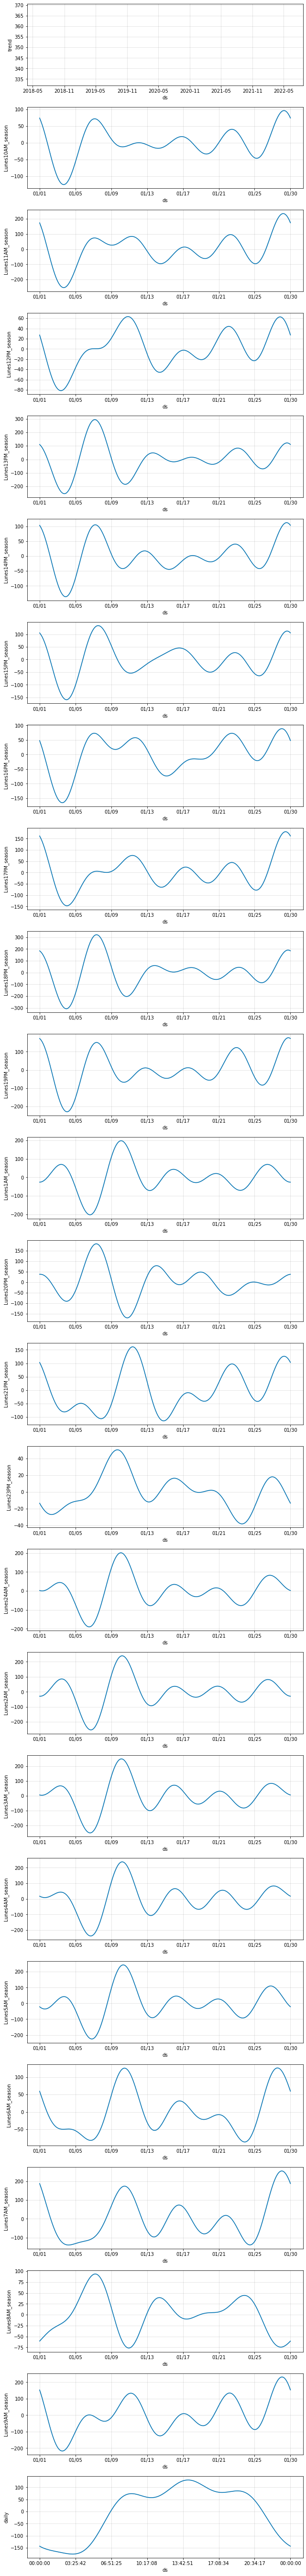

In [20]:
predictions_rolling, fig = crossvalidation()

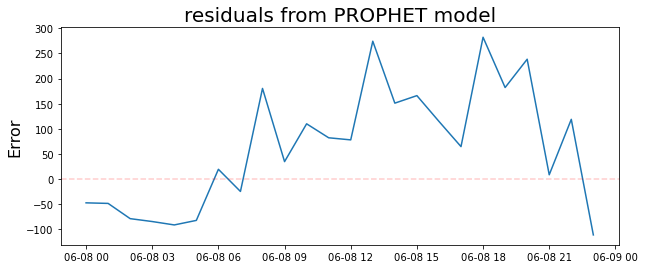

In [21]:
residuals_rolling = test_data_D['y'] - predictions_rolling['yhat']
residuals_rolling = residuals_rolling.to_frame(name='residual_rolling')
#residuals_rolling.head()

plt.figure(figsize=(10,4))
plt.plot(residuals_rolling)
plt.title('residuals from PROPHET model', fontsize=20)
plt.ylabel('Error',fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0, 0.5, 'Desplazamientos')

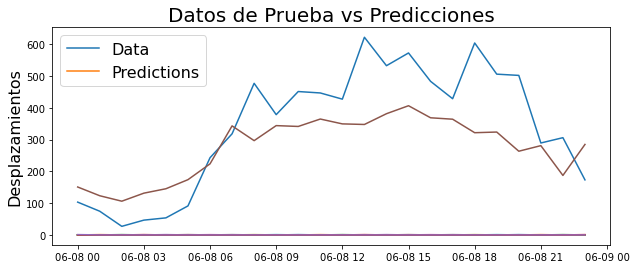

In [22]:
plt.figure(figsize=(10,4))
plt.plot(test_data_D)
plt.plot(predictions_rolling)

plt.legend(('Data','Predictions'),fontsize=16)

plt.title('Datos de Prueba vs Predicciones', fontsize=20)
plt.ylabel('Desplazamientos',fontsize=16)

# Comprobamos overfitting
## Comparamos el primer lunes y el segundo lunes de entrenamiento vs la predicción a ver si existe overfitting
## Al parecer no hay overfitting y el problema reside en el entrenamiento de 2 periodos diferentes (Desescalada y Nueva normalidad)

In [23]:
pruebatrain = train_data_D.iloc[0:24]
pruebatrain2 = train_data_D.iloc[24:48]
pruebaprediction = predictions_rolling
pruebaprediction = pruebaprediction.reset_index()

Text(0, 0.5, 'Desplazamientos')

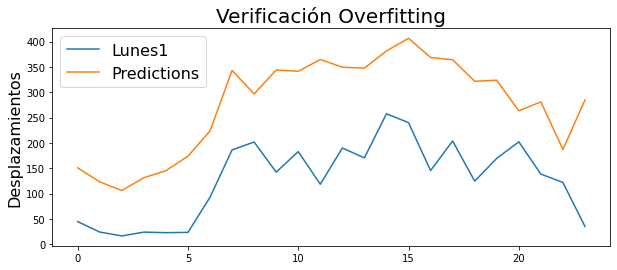

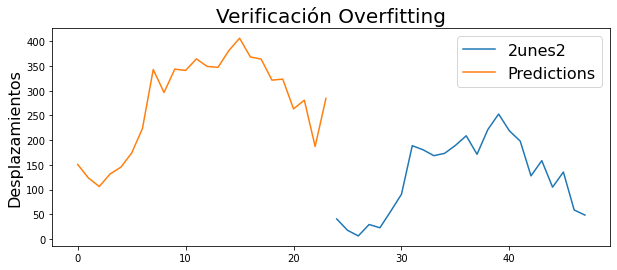

In [24]:
plt.figure(figsize=(10,4))
plt.plot(pruebatrain['y'])
plt.plot(pruebaprediction['yhat'])
plt.legend(('Lunes1','Predictions'),fontsize=16)
plt.title('Verificación Overfitting', fontsize=20)
plt.ylabel('Desplazamientos',fontsize=16)

plt.figure(figsize=(10,4))
plt.plot(pruebatrain2['y'])
plt.plot(pruebaprediction['yhat'])
plt.legend(('2unes2','Predictions'),fontsize=16)
plt.title('Verificación Overfitting', fontsize=20)
plt.ylabel('Desplazamientos',fontsize=16)

# Cálculamos MAPE y RMSE
### RMSE se calculan de 2 formas distintas

## MAPE:

In [25]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals_rolling['residual_rolling']/test_data_D['y'])),4))

Mean Absolute Percent Error: 0.5619


## RMSE 1:

In [26]:
print('Root Mean Squared Error:',np.sqrt(np.mean(residuals_rolling**2)))
RMSE = sqrt(mean_squared_error(test_data_D.y, predictions_rolling.yhat))
RMSE

Root Mean Squared Error: residual_rolling    134.222755
dtype: float64


/home/jonathan/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


134.222754528551

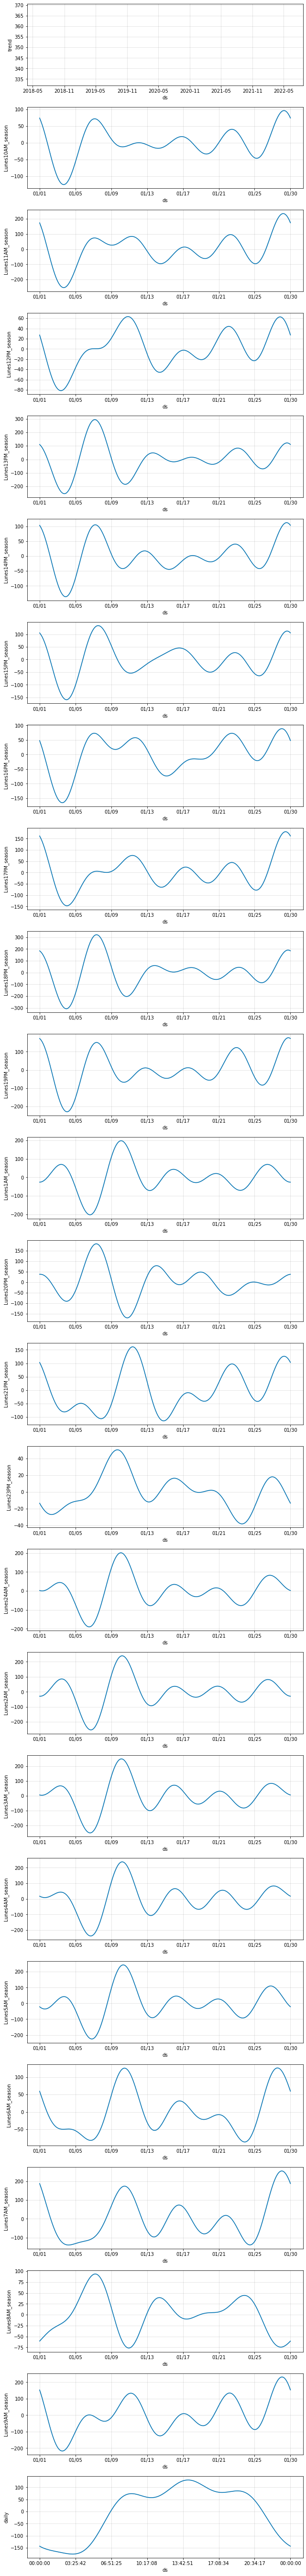

In [27]:
fig

# Nueva Normalidad
## Aplicamos Rolling Forecasting para evaluación del modelo

In [28]:
def crossvalidation():        
    predictions_rolling = pd.DataFrame({})
    test = test_data_N.copy()
    test = test.reset_index()
    test = test.drop(columns=['y'])    
    
    for end_date in test_data_N.index:
        print(end_date)
        train_data_N = LunesNnormalidad[:end_date - timedelta(hours=1)]  #Entrenamos el modelo cada que avanza 1 hora
        train_data_N = train_data_N.reset_index()
        m = Prophet(weekly_seasonality=False,daily_seasonality=True)#,growth='flat')       
#         m.add_seasonality(name='Lunes24AM_season', period=1, fourier_order=5, condition_name='Lunes24AM')
#         m.add_seasonality(name='Lunes1AM_season', period=1, fourier_order=5, condition_name='Lunes1AM')
#         m.add_seasonality(name='Lunes2AM_season', period=1, fourier_order=5, condition_name='Lunes2AM')
#         m.add_seasonality(name='Lunes3AM_season', period=1, fourier_order=5, condition_name='Lunes3AM')
#         m.add_seasonality(name='Lunes4AM_season', period=1, fourier_order=5, condition_name='Lunes4AM')
#         m.add_seasonality(name='Lunes5AM_season', period=1, fourier_order=5, condition_name='Lunes5AM')
#         m.add_seasonality(name='Lunes6AM_season', period=1, fourier_order=5, condition_name='Lunes6AM')
#         m.add_seasonality(name='Lunes7AM_season', period=1, fourier_order=5, condition_name='Lunes7AM')
#         m.add_seasonality(name='Lunes8AM_season', period=1, fourier_order=5, condition_name='Lunes8AM')
        m.add_seasonality(name='Lunes9AM_season', period=71, fourier_order=5, condition_name='Lunes9AM')
#         m.add_seasonality(name='Lunes10AM_season', period=1, fourier_order=5, condition_name='Lunes10AM')
#         m.add_seasonality(name='Lunes11AM_season', period=1, fourier_order=5, condition_name='Lunes11AM')
#         m.add_seasonality(name='Lunes12PM_season', period=1, fourier_order=5, condition_name='Lunes12PM')
#         m.add_seasonality(name='Lunes13PM_season', period=1, fourier_order=5, condition_name='Lunes13PM')
        m.add_seasonality(name='Lunes14PM_season', period=71, fourier_order=5, condition_name='Lunes14PM')        
#         m.add_seasonality(name='Lunes15PM_season', period=1, fourier_order=5, condition_name='Lunes15PM')        
#         m.add_seasonality(name='Lunes16PM_season', period=1, fourier_order=5, condition_name='Lunes16PM')
#         m.add_seasonality(name='Lunes17PM_season', period=1, fourier_order=5, condition_name='Lunes17PM')
        m.add_seasonality(name='Lunes18PM_season', period=71, fourier_order=5, condition_name='Lunes18PM')
#         m.add_seasonality(name='Lunes19PM_season', period=1, fourier_order=5, condition_name='Lunes19PM')
#         m.add_seasonality(name='Lunes20PM_season', period=1, fourier_order=5, condition_name='Lunes20PM')
#         m.add_seasonality(name='Lunes21PM_season', period=1, fourier_order=5, condition_name='Lunes21PM')
#         m.add_seasonality(name='Lunes22PM_season', period=71, fourier_order=5, condition_name='Lunes22PM')
#         m.add_seasonality(name='Lunes23PM_season', period=1, fourier_order=5, condition_name='Lunes23PM')

        m.fit(train_data_N);              
        
        future = test.loc[test.loc[:,'ds'] == end_date]        
        forecast = m.predict(future)        
        output=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
        yhat = output[['ds','yhat']]
        predictions_rolling = predictions_rolling.append(yhat)       
        
    predictions_rolling = predictions_rolling.set_index('ds')
    fig = m.plot_components(forecast)
        
    return predictions_rolling, fig

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


2020-08-31 00:00:00
Initial log joint probability = -19.7977
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      73       596.532    0.00114812       116.153   1.506e-05       0.001      130  LS failed, Hessian reset 
      99       596.757    0.00089046       75.6307           1           1      162   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       596.831   0.000137359       75.9612           1           1      293   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     292       596.852   8.34244e-08       69.6079           1           1      417   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7510/864644878.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)

2020-08-31 01:00:00
Initial log joint probability = -19.617
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      82       596.795   0.000424198       71.0239    5.61e-06       0.001      133  LS failed, Hessian reset 
      99       596.829    2.6773e-06       62.0067       0.176       0.176      154   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     132       596.844   0.000175691       76.0508   2.313e-06       0.001      226  LS failed, Hessian reset 
     192       596.944   0.000456272       88.5636   6.632e-06       0.001      341  LS failed, Hessian reset 
     199       596.986   0.000277292        77.348           1           1      351   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     245       597.007   8.25024e-06       79.9867   1.086e-07       0.001      458  LS failed, Hessian reset 
     271       597.007   2.06612e-08       59.

/tmp/ipykernel_7510/864644878.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remove

2020-08-31 02:00:00
Initial log joint probability = -19.7703
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      73       597.885    0.00139451       90.3134    2.05e-05       0.001      131  LS failed, Hessian reset 
      99       597.949   1.45538e-05       66.9852      0.8519      0.8519      168   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     119       597.953   4.80005e-05       81.6055   6.414e-07       0.001      233  LS failed, Hessian reset 
     199       598.054   5.47964e-05       58.3279      0.6523      0.6523      340   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       598.069    6.7239e-06       60.5154           1           1      473   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     330       598.069   6.91968e-08       55.9564           1           1      516   
O

/tmp/ipykernel_7510/864644878.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remove

2020-08-31 03:00:00
Initial log joint probability = -20.5715
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       599.067    0.00447854       83.4036           1           1      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     121        599.43   0.000987231        86.022   1.319e-05       0.001      199  LS failed, Hessian reset 
     199       599.601    8.0178e-06       74.6147      0.5407      0.5407      294   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     239       599.604   2.84779e-08       51.2483      0.4095           1      346   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/tmp/ipykernel_7510/864644878.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


2020-08-31 04:00:00
Initial log joint probability = -20.0532
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       599.579   1.78201e-05       66.2929      0.3745      0.3745      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       599.683   9.92095e-06       83.2006      0.3731      0.8508      255   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     218       599.692   6.20969e-05       90.3771   7.008e-07       0.001      322  LS failed, Hessian reset 
     299       599.698    1.6216e-06       81.8658           1           1      426   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     328       599.699   2.92628e-08        76.619      0.7765      0.7765      471   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7510/864644878.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remove

2020-08-31 05:00:00
Initial log joint probability = -20.7453
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       600.305   0.000254349       78.6931           1           1      142   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       600.383   0.000231437       64.4297       0.715       0.715      278   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       600.433   8.14348e-07       62.5771           1           1      408   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     311       600.433    2.2389e-08       77.5604      0.1591           1      424   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/tmp/ipykernel_7510/864644878.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remove

2020-08-31 06:00:00
Initial log joint probability = -18.8148
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      72       600.922   0.000443071       88.0763     6.5e-06       0.001      122  LS failed, Hessian reset 
      99       601.093   0.000103223       53.8648      0.6694      0.6694      152   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     159       601.114   8.74007e-08       67.7189   1.244e-09       0.001      268  LS failed, Hessian reset 
     162       601.114   1.93545e-08       64.6267      0.3477      0.9941      272   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/tmp/ipykernel_7510/864644878.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remove

2020-08-31 07:00:00
Initial log joint probability = -17.9681
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       603.727   9.72117e-05       72.5815      0.5206      0.5206      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       603.823   2.43508e-06       80.3261      0.2226           1      266   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     268       603.837   2.08413e-08         75.21      0.1449      0.4243      351   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/tmp/ipykernel_7510/864644878.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remove

2020-08-31 08:00:00
Initial log joint probability = -15.637
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       606.476   6.61827e-05       81.2424       0.486       0.486      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     175       606.572   7.98933e-06       64.1912   1.332e-07       0.001      275  LS failed, Hessian reset 
     194       606.572   2.44635e-08       53.8064      0.1967           1      306   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/tmp/ipykernel_7510/864644878.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remove

2020-08-31 09:00:00
Initial log joint probability = -14.383
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       606.744    0.00532982       89.5053           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     107       607.246    0.00195651       97.7427   3.268e-05       0.001      178  LS failed, Hessian reset 
     199       607.862   5.45125e-05       75.6785           1           1      289   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     257        607.94   0.000198168       63.5717   3.415e-06       0.001      389  LS failed, Hessian reset 
     299       608.142   3.31508e-05       69.8544           1           1      444   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     342       608.154   4.92098e-08       61.8447      0.4885      0.4885      501   
Op

/tmp/ipykernel_7510/864644878.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remove

2020-08-31 10:00:00
Initial log joint probability = -14.4498
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       608.037    0.00173901       86.5854           1           1      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       609.346   1.04438e-05       70.1651      0.4118           1      274   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     238       609.348   4.42709e-08       65.7724           1           1      329   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/tmp/ipykernel_7510/864644878.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


2020-08-31 11:00:00
Initial log joint probability = -14.3861
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      97        610.81   0.000818959       86.3567   1.023e-05       0.001      153  LS failed, Hessian reset 
      99       610.846    0.00104879       85.4981           1           1      155   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     180       611.515   6.83038e-06       64.6955   1.423e-07       0.001      307  LS failed, Hessian reset 
     199       611.518    1.2748e-05       73.6975           1           1      338   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       611.563   7.94137e-06       70.4868      0.5301      0.5301      463   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     313       611.568     1.076e-05       72.5022   1.802e-07       0.001      512  LS 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7510/864644878.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remove

2020-08-31 12:00:00
Initial log joint probability = -14.9369
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       613.149    0.00361966       60.5237      0.3453           1      140   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     104       613.214    0.00046464       80.0116   6.281e-06       0.001      186  LS failed, Hessian reset 
     199       613.653   0.000245452       62.0595       0.631       0.631      315   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     236       613.831   0.000423938       69.5657   6.215e-06       0.001      391  LS failed, Hessian reset 
     299       613.972   4.66611e-06       70.4758           1           1      475   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     318       613.973   2.21056e-07       75.9432   4.002e-09       0.001      532  LS 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7510/864644878.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remove

2020-08-31 13:00:00
Initial log joint probability = -14.3773
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       614.956    0.00235395       89.4735      0.8271      0.8271      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     123       615.669    0.00198172       62.5418   3.354e-05       0.001      190  LS failed, Hessian reset 
     199       616.465    1.8295e-05       57.4661      0.4113      0.4113      280   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     296       616.608   0.000518906       80.0148   6.841e-06       0.001      433  LS failed, Hessian reset 
     299       616.637   0.000483059       69.7051           1           1      436   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       616.729   1.35071e-06       72.3929      0.9139      0.9139      566   
 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7510/864644878.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remove

2020-08-31 14:00:00
Initial log joint probability = -14.6925
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       618.631     0.0198481       108.751           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       619.342   3.84021e-08       61.9171      0.2729           1      265   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     200       619.342   4.47132e-08        44.566           1           1      266   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/tmp/ipykernel_7510/864644878.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


2020-08-31 15:00:00
Initial log joint probability = -15.4308
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       619.676   0.000427944       72.1219      0.5192      0.5192      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     112        621.19    0.00132922       158.781   8.979e-06       0.001      173  LS failed, Hessian reset 
     199       621.707   1.82093e-05       59.1954           1           1      282   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       621.757   0.000113385       63.5109      0.8771      0.8771      399   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     350       621.852   0.000240792       78.3548   2.756e-06       0.001      505  LS failed, Hessian reset 
     399       621.879   1.54739e-07       53.5063           1           1      569   
 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7510/864644878.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remove

2020-08-31 16:00:00
Initial log joint probability = -14.3921
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       623.019    0.00439307       83.6993           1           1      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     117       623.688     0.0010241       61.1702   1.306e-05       0.001      194  LS failed, Hessian reset 
     199        624.23   1.71166e-07       69.2799      0.2256      0.2256      306   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     231       624.245   7.93614e-05       72.1674   8.108e-07       0.001      392  LS failed, Hessian reset 
     271       624.247   9.69885e-09       61.1875     0.02005           1      451   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/tmp/ipykernel_7510/864644878.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


2020-08-31 17:00:00


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -17.1417
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       617.872    0.00260659       75.8337           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     136       619.462   0.000900518       99.5532   1.455e-05       0.001      207  LS failed, Hessian reset 
     199       620.141    8.4315e-05       66.1982      0.4813      0.4813      292   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     232       620.164   1.45608e-05       52.5508    1.88e-07       0.001      377  LS failed, Hessian reset 
     299       620.177    0.00164501       92.9199       4.234      0.4234      464   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     377       620.259   4.81155e-05       77.9086   5.615e-07       0.001      645  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7510/864644878.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remove

2020-08-31 18:00:00
Initial log joint probability = -14.6878
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       621.085    0.00655028       81.5217           1           1      136   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     103       621.324   0.000771034       102.999   5.987e-06       0.001      171  LS failed, Hessian reset 
     199         622.3     1.625e-05       46.8674           1           1      289   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     287       622.371   9.89315e-06       71.4396   1.364e-07       0.001      441  LS failed, Hessian reset 
     299       622.372   2.13181e-07       61.5542       2.309      0.2309      460   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     307       622.372   6.13485e-09       66.7217     0.00483           1      475   
O

/tmp/ipykernel_7510/864644878.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remove

2020-08-31 19:00:00
Initial log joint probability = -15.2745
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99         623.3    0.00111991       106.884      0.7294      0.7294      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     112       624.282    0.00122584       131.553   2.212e-05       0.001      178  LS failed, Hessian reset 
     199       624.921   0.000175765       71.8928           1           1      292   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     225       624.961   0.000206885        63.903   3.714e-06       0.001      363  LS failed, Hessian reset 
     272       624.986   4.59663e-06       55.7036   6.648e-08       0.001      465  LS failed, Hessian reset 
     292       624.986   3.37522e-08       63.8562      0.8735       0.231      494   
Optimization terminated normally: 
  Convergence detected: relative g

/tmp/ipykernel_7510/864644878.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


2020-08-31 20:00:00
Initial log joint probability = -14.8639
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        625.41    0.00793177       78.5925           1           1      134   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     113       626.535   0.000920111       93.9264   1.297e-05       0.001      183  LS failed, Hessian reset 
     199       627.322   0.000689535       67.4734      0.6272      0.6272      300   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     211       627.335   3.95861e-05       73.0129   5.718e-07       0.001      374  LS failed, Hessian reset 
     299       627.389   0.000101516        51.383   2.163e-06       0.001      520  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     357       627.406   6.34926e-09       54.8374     0.05154  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7510/864644878.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remove

2020-08-31 21:00:00
Initial log joint probability = -15.3461
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       627.756     0.0108028       86.7209           1           1      136   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     141       628.139   0.000315918       76.4083   4.619e-06       0.001      222  LS failed, Hessian reset 
     199       628.258   2.12141e-05       53.3612           1           1      298   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     264       628.261   6.15812e-07       60.1644      0.5879      0.5879      388   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/tmp/ipykernel_7510/864644878.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remove

2020-08-31 22:00:00
Initial log joint probability = -15.9539
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       630.548   0.000286648       58.1185      0.4792      0.4792      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       630.874   8.04289e-05       52.9219       1.568      0.4102      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        630.89   1.74024e-06       46.8548           1           1      377   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       630.904   2.44131e-06       77.3244           1           1      504   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     423       630.904   4.56379e-08       74.4417      0.4519           1      542   
Optimization terminated normally: 
  Converg

/tmp/ipykernel_7510/864644878.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


2020-08-31 23:00:00
Initial log joint probability = -17.9036
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      91       633.041   0.000359649       68.9134   5.163e-06       0.001      151  LS failed, Hessian reset 
      99       633.061      0.000326       54.5146       2.381      0.7026      162   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       633.151   3.27847e-05       79.7228      0.7664      0.7664      294   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        633.66   3.32262e-05       50.9178     0.05673           1      417   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     319       633.663   7.65012e-06       68.7745   1.491e-07       0.001      506  LS failed, Hessian reset 
     366       633.664   3.52395e-07       73.2094   5.272e-09       0.001      607  LS 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_7510/864644878.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)

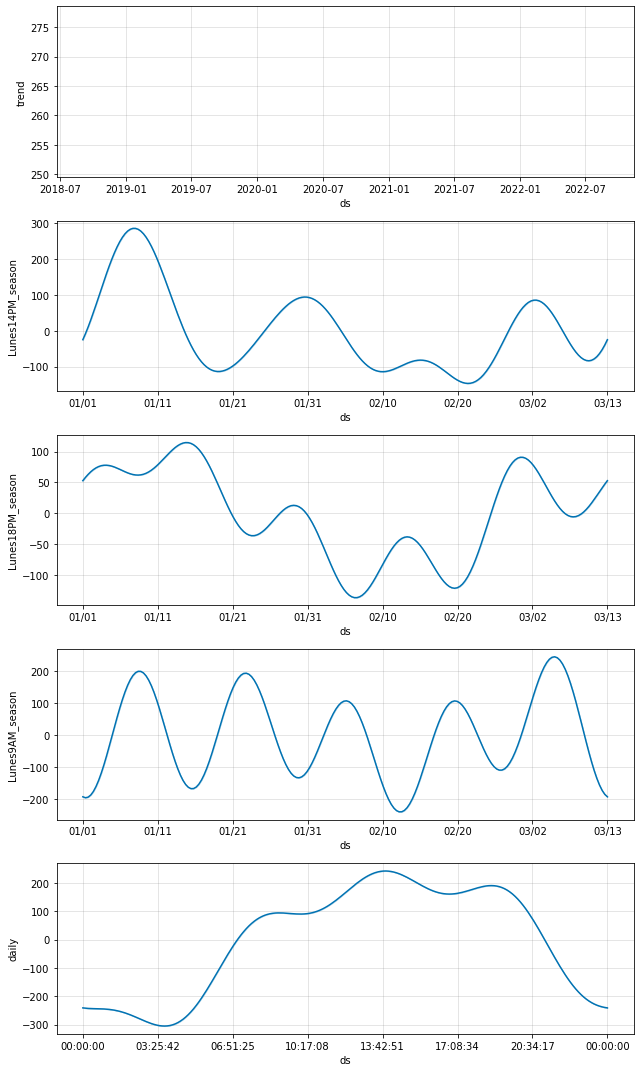

In [29]:
predictions_rolling, fig = crossvalidation()

In [30]:
residuals_rolling = test_data_N['y'] - predictions_rolling['yhat']
residuals_rolling = residuals_rolling.to_frame(name='residual_rolling')
residuals_rolling.head()

,residual_rolling
ds,
2020-08-31 00:00:00,116.635404
2020-08-31 01:00:00,109.746288
2020-08-31 02:00:00,96.473030
2020-08-31 03:00:00,138.940372
2020-08-31 04:00:00,121.333216


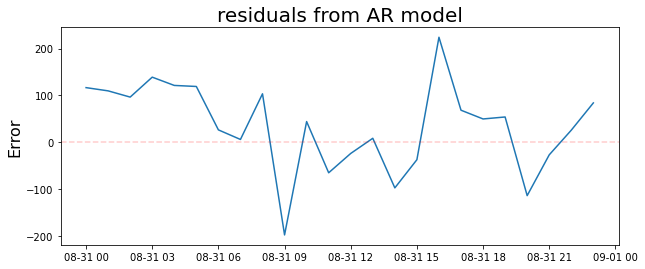

In [31]:
plt.figure(figsize=(10,4))
plt.plot(residuals_rolling)
plt.title('residuals from AR model', fontsize=20)
plt.ylabel('Error',fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0, 0.5, 'Desplazamientos')

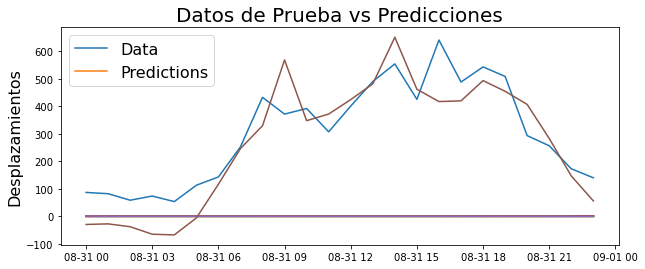

In [32]:
plt.figure(figsize=(10,4))
plt.plot(test_data_N)
plt.plot(predictions_rolling)

plt.legend(('Data','Predictions'),fontsize=16)

plt.title('Datos de Prueba vs Predicciones', fontsize=20)
plt.ylabel('Desplazamientos',fontsize=16)

# Comprobamos overfitting
## Comparamos el primer lunes y el segundo lunes de entrenamiento vs la predicción a ver si existe overfitting

In [33]:
pruebatrain = train_data_N.iloc[0:24]
pruebatrain2 = train_data_N.iloc[24:48]
pruebaprediction = predictions_rolling
pruebaprediction = pruebaprediction.reset_index()

Text(0, 0.5, 'Desplazamientos')

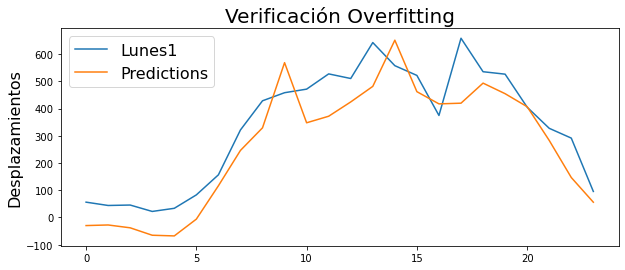

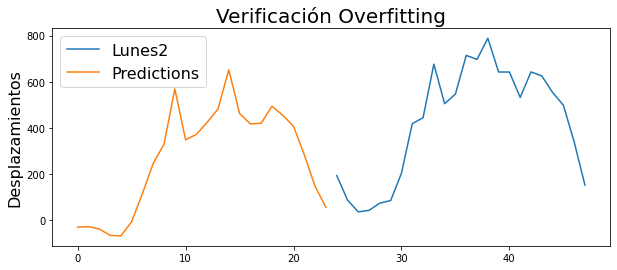

In [34]:
plt.figure(figsize=(10,4))
plt.plot(pruebatrain['y'])
plt.plot(pruebaprediction['yhat'])
plt.legend(('Lunes1','Predictions'),fontsize=16)
plt.title('Verificación Overfitting', fontsize=20)
plt.ylabel('Desplazamientos',fontsize=16)

plt.figure(figsize=(10,4))
plt.plot(pruebatrain2['y'])
plt.plot(pruebaprediction['yhat'])
plt.legend(('Lunes2','Predictions'),fontsize=16)
plt.title('Verificación Overfitting', fontsize=20)
plt.ylabel('Desplazamientos',fontsize=16)


# Cálculamos MAPE y RMSE
### RMSE se calculan de 2 formas distintas

# MAPE

In [35]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals_rolling['residual_rolling']/test_data_N['y'])),4))

Mean Absolute Percent Error: 0.5462


# RMSE

In [36]:
print('Root Mean Squared Error:',np.sqrt(np.mean(residuals_rolling**2)))
RMSE = sqrt(mean_squared_error(test_data_N.y, predictions_rolling.yhat))
RMSE

Root Mean Squared Error: residual_rolling    98.462746
dtype: float64


/home/jonathan/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


98.46274604869893

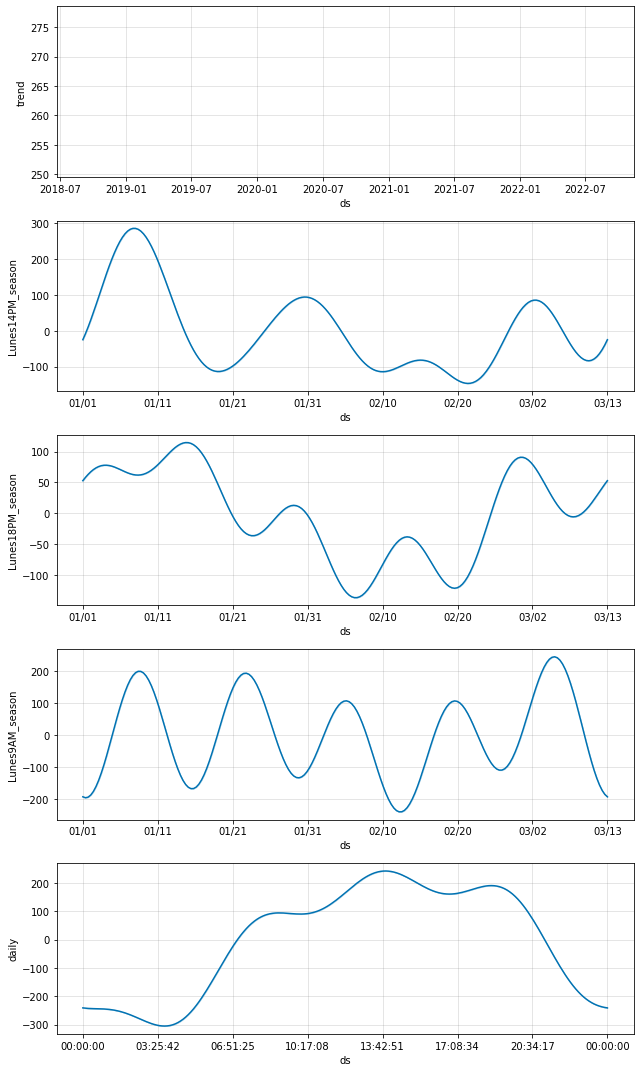

In [37]:
fig